# Wine Quality Classification Workshop
## A Machine Learning Tutorial

In this workshop, we'll explore wine quality prediction using machine learning.
We'll cover the complete ML pipeline from data exploration to model evaluation.

**Dataset:** Wine Quality Dataset  
**Source:** UCI Machine Learning Repository  
**Problem Type:** Binary Classification (Good vs Bad Wine)

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [2]:
# Load the wine quality dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: (1599, 12)

First few rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Information

In [3]:
print("--- Dataset Info ---")
print(df.info())

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [4]:
print("--- Statistical Summary ---")
df.describe()

--- Statistical Summary ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 3.2 Check for Missing Values

In [5]:
print("--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

--- Missing Values ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0


### 3.3 Distribution of Wine Quality

In [6]:
print("--- Wine Quality Distribution ---")
print(df['quality'].value_counts().sort_index())

--- Wine Quality Distribution ---
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


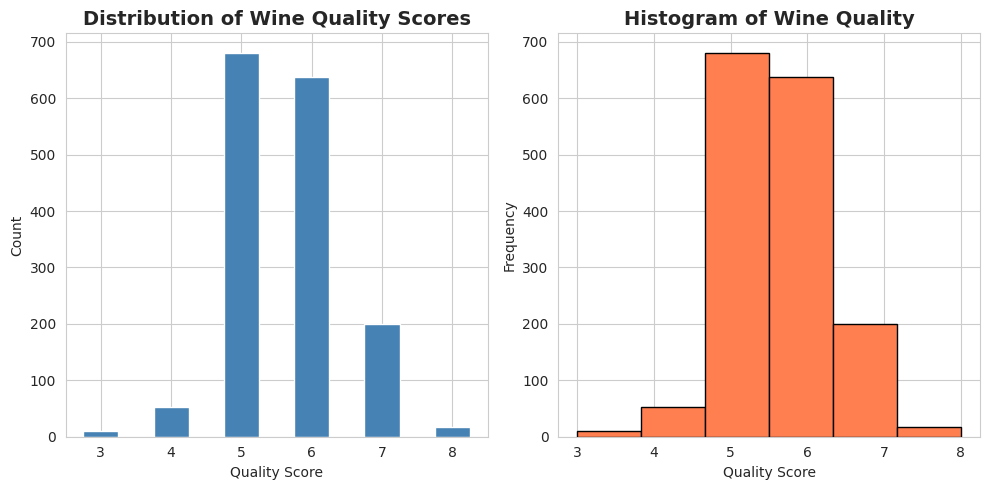

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['quality'].plot(kind='hist', bins=6, color='coral', edgecolor='black')
plt.title('Histogram of Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Feature Distributions

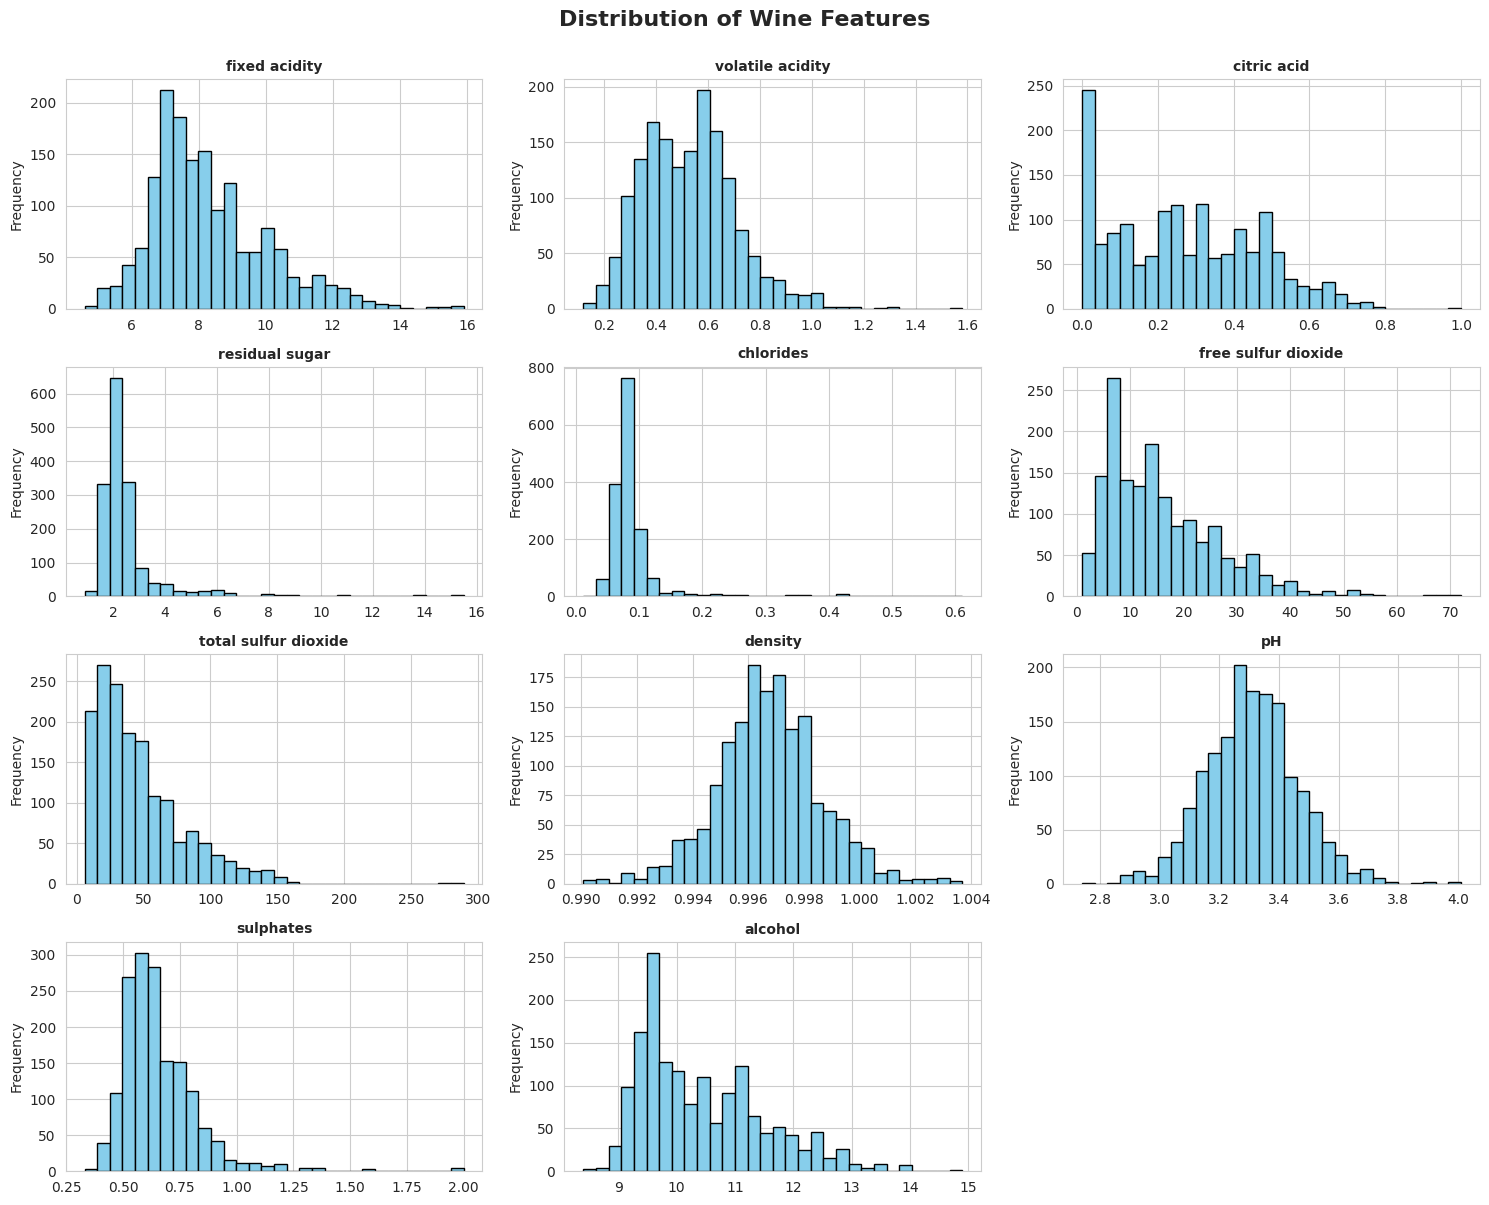

In [8]:
# Select numerical features (all except quality)
features = df.columns[:-1]

# Plot distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequency')

# Remove extra subplot
fig.delaxes(axes[-1])
plt.suptitle('Distribution of Wine Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 5. Outlier Detection

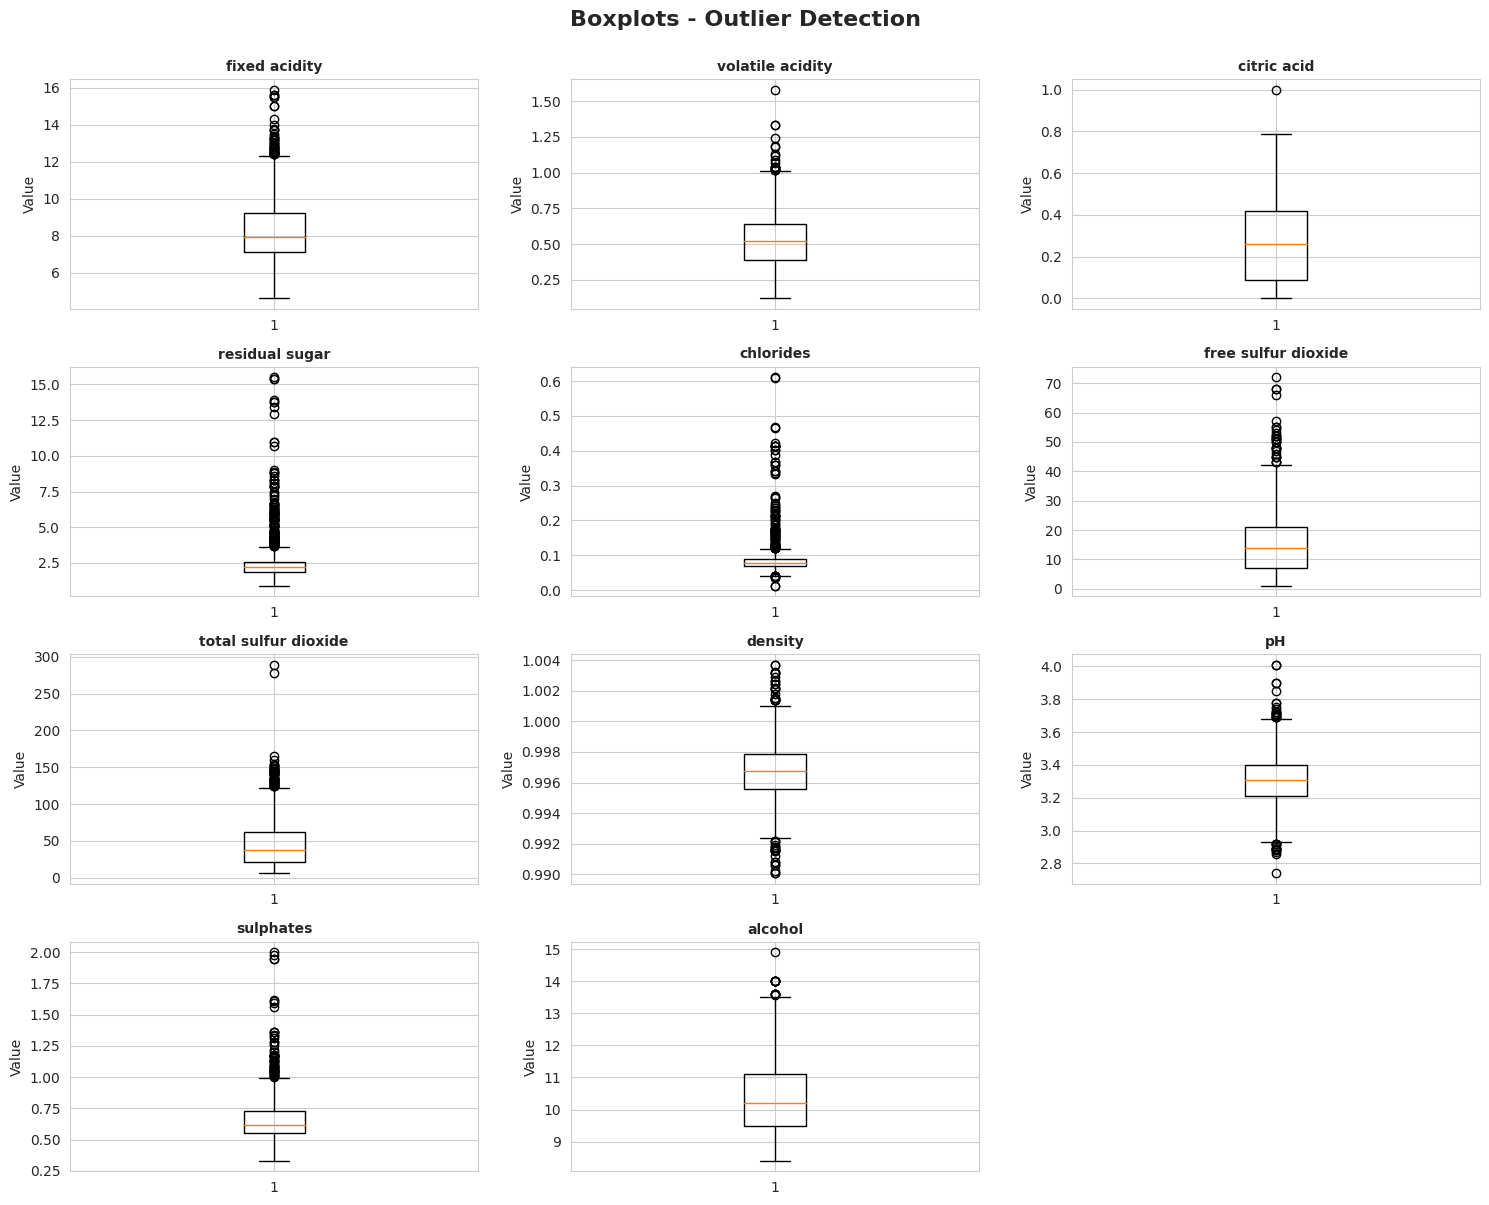

In [9]:
# Visualize outliers using boxplots
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].boxplot(df[feature])
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')

fig.delaxes(axes[-1])
plt.suptitle('Boxplots - Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**Note:** For this tutorial, we'll keep outliers as they might be legitimate wine properties. In practice, you might want to handle them using IQR method or other techniques.

## 6. Create Binary Classification Target

In [10]:
# Convert quality scores to binary: Good (1) vs Bad (0)
# Wines with quality >= 7 are considered "good", others are "bad"
df['quality_binary'] = (df['quality'] >= 7).astype(int)

print("Binary Classification Distribution:")
print(df['quality_binary'].value_counts())
print(f"\nClass Balance:")
print(df['quality_binary'].value_counts(normalize=True))

Binary Classification Distribution:
quality_binary
0    1382
1     217
Name: count, dtype: int64

Class Balance:
quality_binary
0    0.86429
1    0.13571
Name: proportion, dtype: float64


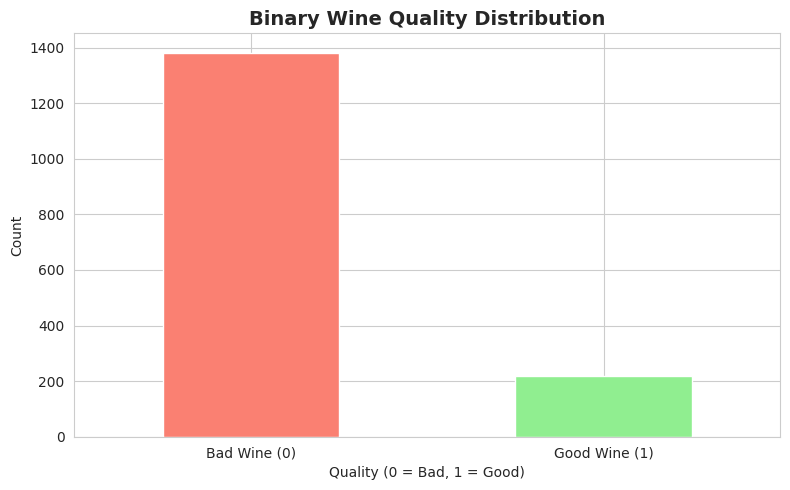

In [11]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
df['quality_binary'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Binary Wine Quality Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Quality (0 = Bad, 1 = Good)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Bad Wine (0)', 'Good Wine (1)'], rotation=0)
plt.tight_layout()
plt.show()

## 7. Correlation Analysis

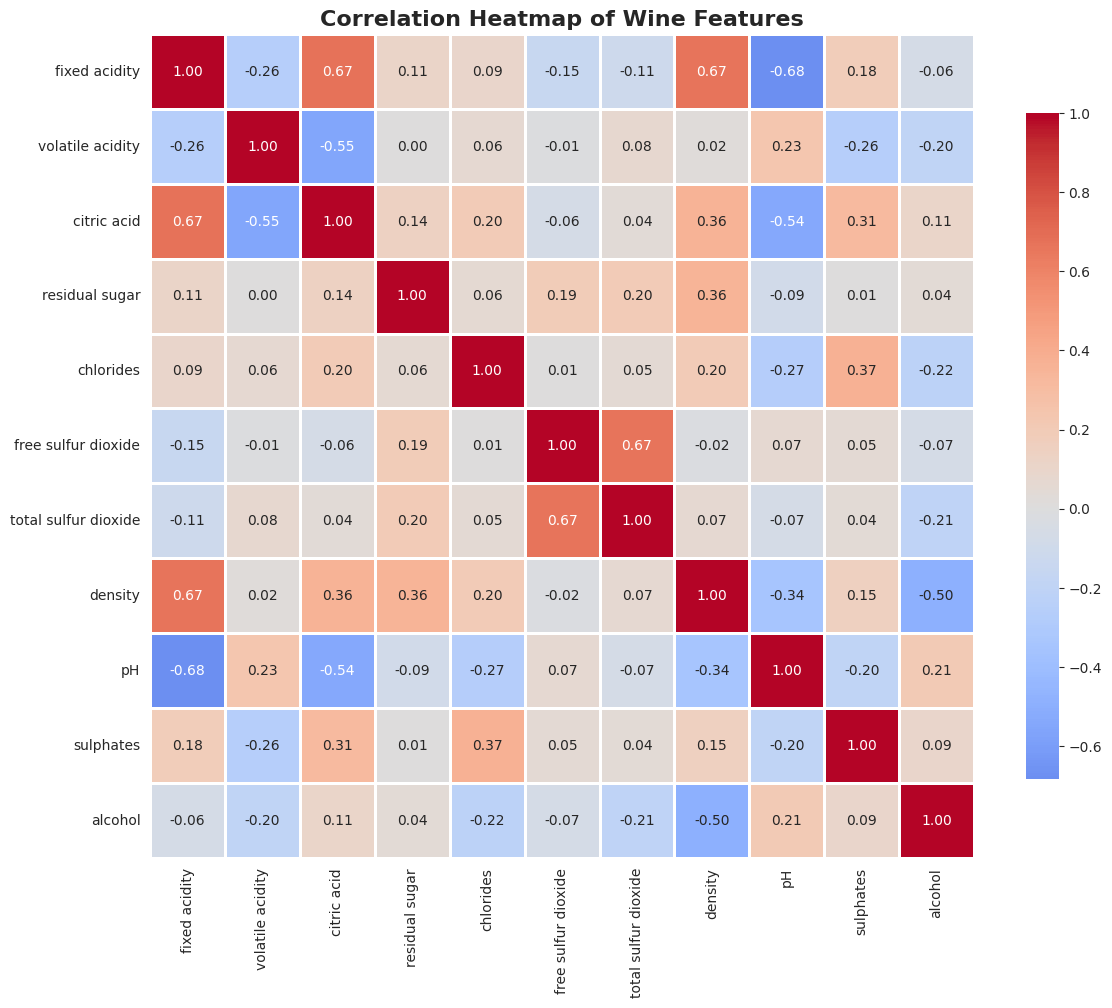

In [12]:
# Calculate correlation matrix
correlation_matrix = df[features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Wine Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Red colors = Strong positive correlation (features increase together)

Blue colors = Strong negative correlation (one increases while the other decreases)

White/light colors = Weak or no correlation

**Strong Positive Correlations**
Fixed Acidity - Citric Acid (r ≈ 0.67)

Wine samples with higher fixed acidity also tend to have more citric acid

Both are measures of sourness in wine, so they're naturally linked

(These features are somewhat redundant—they measure related chemical properties)


Fixed Acidity - Density (r ≈ 0.67)

Wines with more fixed acidity are denser

This makes chemical sense: acidic compounds add mass to the solution

(Physical/chemical properties of wine are interconnected)

**Strong Negative Correlations**
Alcohol - Density (r ≈ -0.50)

Higher alcohol content correlates with LOWER density

This is chemically correct: alcohol is less dense than water

(This is a predictable relationship based on chemistry, useful for data validation)

pH - Fixed Acidity (r ≈ -0.68)

More acidity means LOWER pH (more acidic)

This is the chemistry definition of pH!

(This strong inverse relationship shows our data makes chemical sense)

**Nearly Independent Features (White/light areas)**
Sulphates - mostly independent from other features

Weak correlations with almost everything

Sulphates add unique information that other features don't provide

Important for the model since it's not just echoing other measurements

Volatile Acidity - relatively independent

Measures a different type of acidity

Doesn't strongly correlate with fixed acidity or citric acid

Captures different information; important for quality prediction

Residual Sugar - mostly isolated

Shows little correlation with other features

Adds unique variation to the dataset

**Food for though**
Chemical Sense-Checking: Notice how pH is inversely related to acidity measures. Does this match what you know about chemistry? 

Feature Clusters: Could you identify three "correlated clusters"?

Feature Selection: If we had to reduce features, could we drop one from the acidity cluster? Why or why not?

Prediction Power: The independent features (sulphates, volatile acidity) often predict quality better than the correlated ones. Can you think why?



In [13]:
# Correlation with target variable
print("--- Correlation with Quality ---")
feature_correlations = df[list(features) + ['quality']].corr()['quality'].sort_values(ascending=False)
print(feature_correlations)

--- Correlation with Quality ---
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


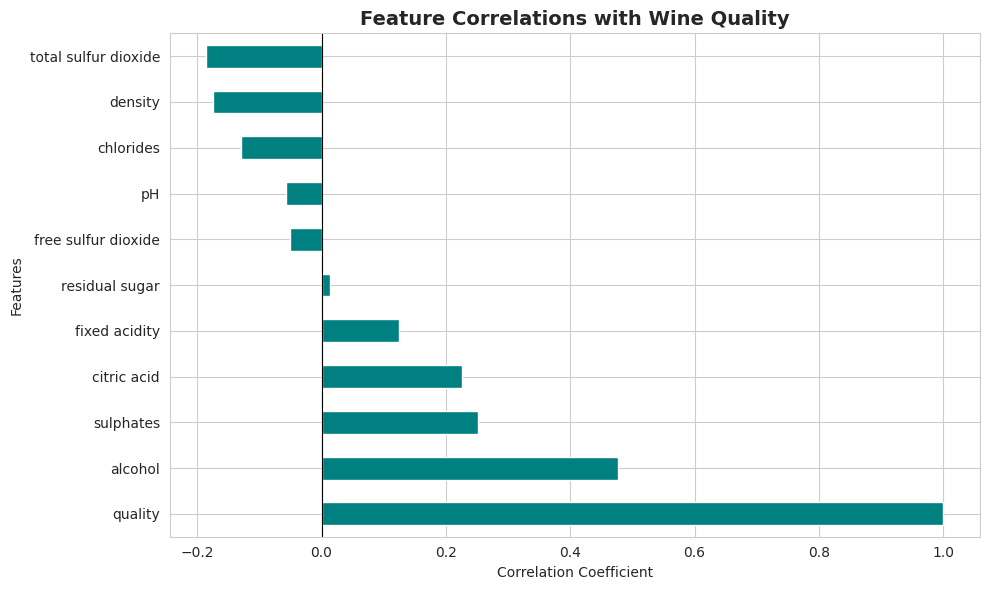

In [14]:
# Visualize correlations with quality
plt.figure(figsize=(10, 6))
feature_correlations[:-1].plot(kind='barh', color='teal')
plt.title('Feature Correlations with Wine Quality', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

# Understanding Feature Correlations with Wine Quality



## Key Findings: The Top Predictors

### 1. ALCOHOL (r ≈ +0.48)
**What this means:**
- Higher alcohol content correlates with better quality wines
- For every unit increase in alcohol, quality tends to improve

**Why it matters:**
- Alcohol is evidence of successful fermentation
- Higher fermentation = more sugar was converted
- More complex flavors and better balance typically develop

---

### 2. SULPHATES (r ≈ +0.25)
**What this means:**
- More sulphates, slightly better wine quality
- Weaker than alcohol, but still meaningful

**Why it matters:**
- Sulphates are preservatives that protect wine from oxidation
- They also have antimicrobial properties, preventing spoilage
- Well-preserved wines maintain quality longer


---

### 3. VOLATILE ACIDITY (r ≈ -0.39)
**What this means:**
- Higher volatile acidity, LOWER wine quality
- One of the most important features to avoid

**Why it matters:**
- Volatile acidity is caused by acetic acid (the compound that makes vinegar smell)
- It indicates microbial spoilage or chemical degradation
- High levels create unpleasant, vinegar-like tastes

---

## Features with Weak Correlations (Near Zero)

### Features Like FREE SO2, RESIDUAL SUGAR, pH:
**What this means:**
- These features have correlations very close to zero
- Very weak or almost no relationship with quality
- They don't help us predict quality well

**Why it matters:**
- This teaches an important ML lesson: not all features are equally useful
- Some features add noise rather than signal

---

## Big Picture Insights

### 1. **Positive vs. Negative Patterns**
- **Only one strong NEGATIVE predictor**: Volatile acidity (spoilage/defect indicator)
- **Multiple weaker POSITIVE predictors**: Various chemicals that contribute to quality

---

## Discussion Questions for Students

1. **Why is alcohol the strongest predictor?**
   - Think about fermentation, chemistry, and wine production

2. **Compare alcohol (0.48) vs. sulphates (0.25):**
   - Why is alcohol roughly 2x stronger? What does this tell us about their importance?

3. **Why is volatile acidity negative?**
   - What chemical/biological process does it represent?

4. **If you had to pick only 2 features to predict quality, which would you choose and why?**
   - Hint: Consider correlation strength AND what they represent

5. **Some features have almost zero correlation. Should we:**
   - a) Remove them from the model?
   - b) Keep them (they won't hurt)?
   - c) Investigate further?
   - **Why?**

---

## Real-World Implications

This analysis shows wine producers that:
- ✓ **Focus on fermentation management** (affects alcohol content)
- ✓ **Control microbial spoilage** (reduces volatile acidity)
- ✓ **Monitor preservatives** (sulphates help)
- ✓ **But remember:** no single factor guarantees quality—it's about the whole system

---

## Connection to Our ML Models

When we train SVM and Decision Tree models, these feature-quality correlations explain:
- Which features will likely be most important in model decisions
- Why some features might be pruned in the decision tree
- Which features contribute most to the classification boundary in SVM

## 8. Feature Scaling

In [15]:
# Separate features and target
X = df[features].values
y = df['quality_binary'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures scaled successfully!")
print(f"Original feature means: {X.mean(axis=0)[:3]} ...")
print(f"Scaled feature means: {X_scaled.mean(axis=0)[:3]} ...")
print(f"Scaled feature stds: {X_scaled.std(axis=0)[:3]} ...")

Features shape: (1599, 11)
Target shape: (1599,)

Features scaled successfully!
Original feature means: [8.31963727 0.52782051 0.27097561] ...
Scaled feature means: [ 3.55493551e-16  1.68859437e-16 -7.10987103e-17] ...
Scaled feature stds: [1. 1. 1.] ...


## 9. Train-Test Split

In [16]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u}: {c} samples ({c/len(y_train)*100:.1f}%)")

Training set size: 1279 samples
Testing set size: 320 samples

Training set class distribution:
  Class 0: 1105 samples (86.4%)
  Class 1: 174 samples (13.6%)


## 10. Model Training - Support Vector Machine (SVM)

In [17]:
# Train SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")

SVM Accuracy: 0.9000 (90.00%)


In [18]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_svm, target_names=['Bad Wine', 'Good Wine']))

--- Classification Report ---
              precision    recall  f1-score   support

    Bad Wine       0.91      0.98      0.94       277
   Good Wine       0.76      0.37      0.50        43

    accuracy                           0.90       320
   macro avg       0.84      0.68      0.72       320
weighted avg       0.89      0.90      0.88       320



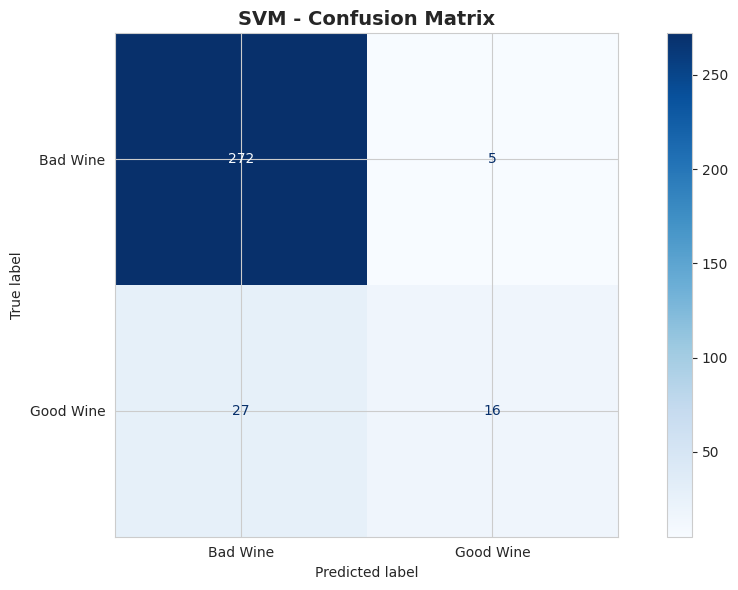

In [19]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Bad Wine', 'Good Wine'])
disp.plot(cmap='Blues', values_format='d')
plt.title('SVM - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 11. Model Training - Decision Tree

In [20]:
# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

Decision Tree Accuracy: 0.9187 (91.88%)


In [21]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_dt, target_names=['Bad Wine', 'Good Wine']))

--- Classification Report ---
              precision    recall  f1-score   support

    Bad Wine       0.94      0.96      0.95       277
   Good Wine       0.73      0.63      0.68        43

    accuracy                           0.92       320
   macro avg       0.84      0.80      0.81       320
weighted avg       0.91      0.92      0.92       320



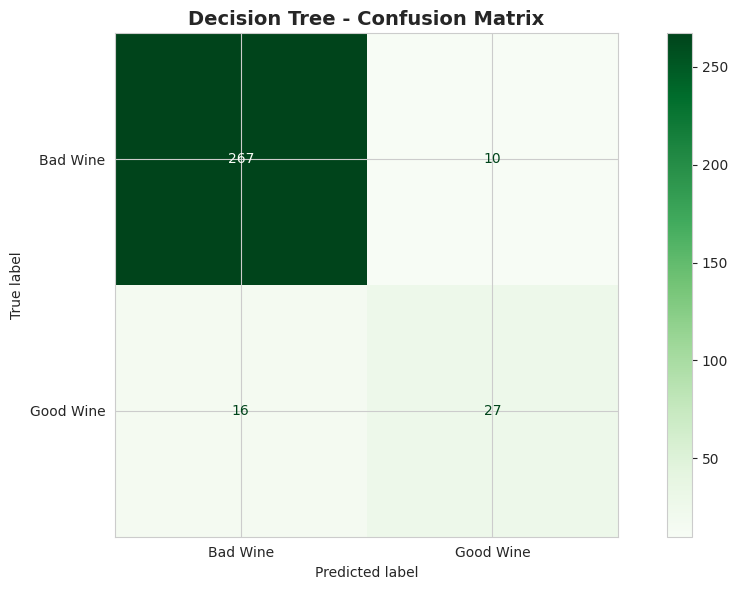

In [22]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Bad Wine', 'Good Wine'])
disp.plot(cmap='Greens', values_format='d')
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Feature Importance

In [23]:
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("--- Feature Importance ---")
print(feature_importance)

--- Feature Importance ---
                 feature  importance
10               alcohol    0.379780
9              sulphates    0.166660
1       volatile acidity    0.116835
6   total sulfur dioxide    0.102794
3         residual sugar    0.084381
8                     pH    0.080202
5    free sulfur dioxide    0.052794
2            citric acid    0.009928
0          fixed acidity    0.006625
4              chlorides    0.000000
7                density    0.000000


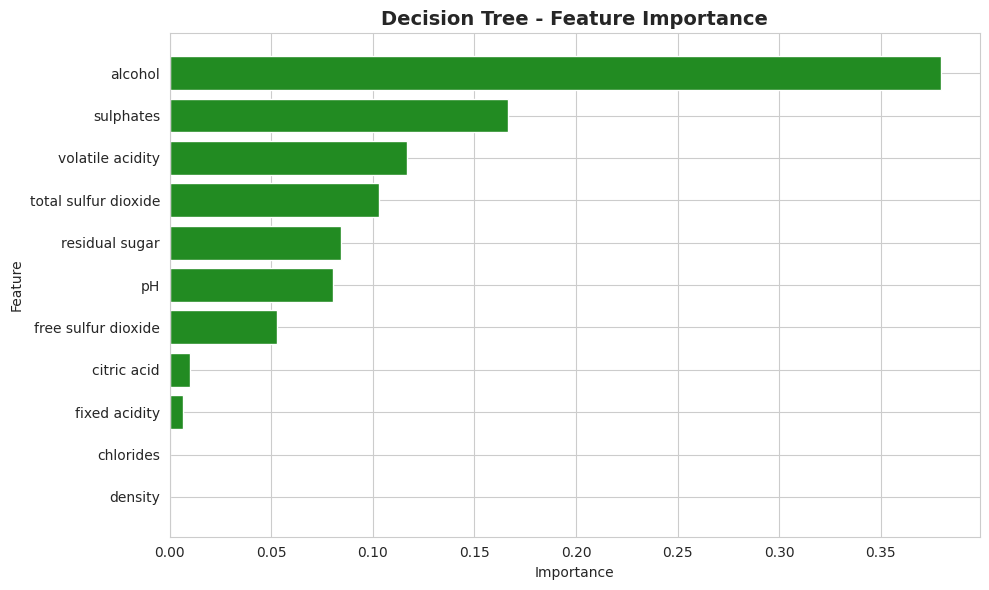

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='forestgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 12. Model Training - Random Forest

In [25]:
# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

Random Forest Accuracy: 0.9031 (90.31%)


In [26]:
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['Bad Wine', 'Good Wine']))

--- Classification Report ---
              precision    recall  f1-score   support

    Bad Wine       0.90      1.00      0.95       277
   Good Wine       0.93      0.30      0.46        43

    accuracy                           0.90       320
   macro avg       0.92      0.65      0.70       320
weighted avg       0.91      0.90      0.88       320



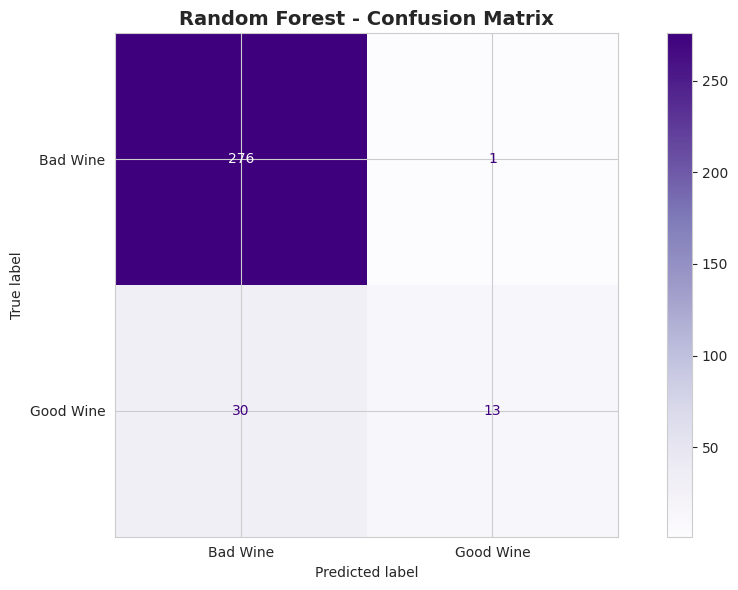

In [27]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Bad Wine', 'Good Wine'])
disp.plot(cmap='Purples', values_format='d')
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 13. Model Comparison

In [28]:
# Compare accuracies
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [svm_accuracy, dt_accuracy, rf_accuracy]
}).sort_values('Accuracy', ascending=False)

print("--- Model Performance Comparison ---")
print(results)

--- Model Performance Comparison ---
           Model  Accuracy
1  Decision Tree  0.918750
2  Random Forest  0.903125
0            SVM  0.900000


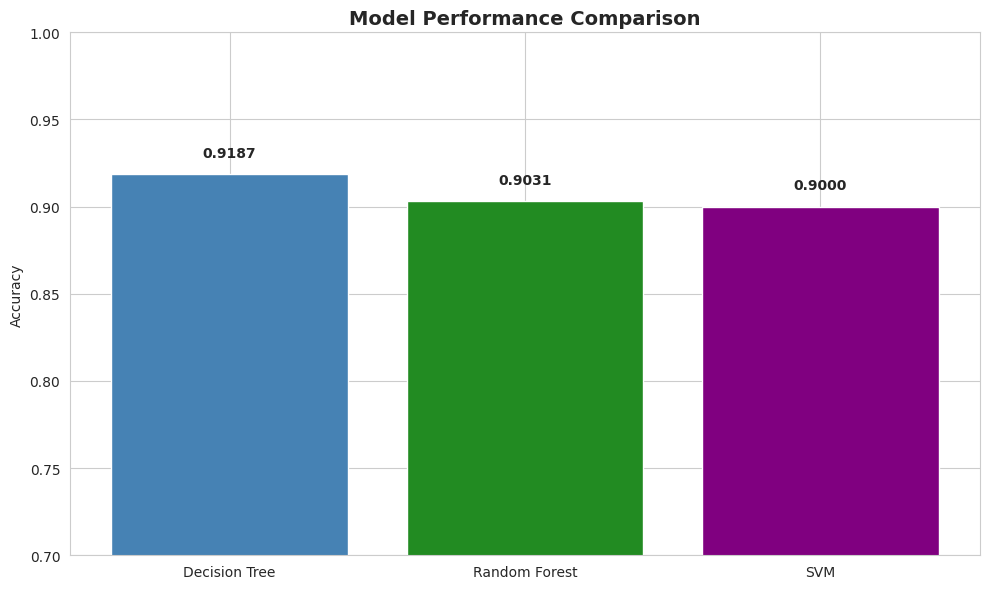

In [29]:
# Visualize comparison
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], color=['steelblue', 'forestgreen', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([0.7, 1.0])
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## 14. Exploring Class Balance: Improving Model Performance

### Understanding Class Imbalance
In our initial binary classification, we grouped wines as:
- **Good wines**: quality ≥ 7 (fewer samples)
- **Bad wines**: quality < 7 (many more samples)

This creates **class imbalance**, which can bias our models toward the majority class.
Let's experiment with different thresholds to create more balanced classes and see if performance improves.

### 14.1 Analyze Current Class Distribution

In [30]:
print("--- Current Quality Distribution ---")
print(df['quality'].value_counts().sort_index())
print(f"\nQuality range: {df['quality'].min()} to {df['quality'].max()}")

# Current binary classification (quality >= 7)
df['quality_binary_original'] = (df['quality'] >= 7).astype(int)
print(f"\n--- Original Binary Split (≥7 = Good) ---")
print(df['quality_binary_original'].value_counts())
print(f"Class distribution:")
print(f"  Bad wines (0): {(df['quality_binary_original'] == 0).sum()} ({(df['quality_binary_original'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  Good wines (1): {(df['quality_binary_original'] == 1).sum()} ({(df['quality_binary_original'] == 1).sum()/len(df)*100:.1f}%)")
imbalance = (df['quality_binary_original'] == 0).sum() / (df['quality_binary_original'] == 1).sum()
print(f"Imbalance ratio: {imbalance:.2f}:1")

--- Current Quality Distribution ---
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Quality range: 3 to 8

--- Original Binary Split (≥7 = Good) ---
quality_binary_original
0    1382
1     217
Name: count, dtype: int64
Class distribution:
  Bad wines (0): 1382 (86.4%)
  Good wines (1): 217 (13.6%)
Imbalance ratio: 6.37:1


### 14.2 Try Alternative Thresholds for Better Balance

In [31]:
# Try different thresholds
thresholds = [5, 5.5, 6, 6.5, 7]

print("\n--- Testing Different Quality Thresholds ---\n")

for threshold in thresholds:
    df[f'quality_binary_t{threshold}'] = (df['quality'] > threshold).astype(int)
    bad_count = (df[f'quality_binary_t{threshold}'] == 0).sum()
    good_count = (df[f'quality_binary_t{threshold}'] == 1).sum()
    ratio = bad_count / good_count if good_count > 0 else float('inf')
    
    print(f"Threshold: > {threshold}")
    print(f"  Bad wines (0): {bad_count} ({bad_count/len(df)*100:.1f}%)")
    print(f"  Good wines (1): {good_count} ({good_count/len(df)*100:.1f}%)")
    print(f"  Imbalance ratio: {ratio:.2f}:1")
    print()


--- Testing Different Quality Thresholds ---

Threshold: > 5
  Bad wines (0): 744 (46.5%)
  Good wines (1): 855 (53.5%)
  Imbalance ratio: 0.87:1

Threshold: > 5.5
  Bad wines (0): 744 (46.5%)
  Good wines (1): 855 (53.5%)
  Imbalance ratio: 0.87:1

Threshold: > 6
  Bad wines (0): 1382 (86.4%)
  Good wines (1): 217 (13.6%)
  Imbalance ratio: 6.37:1

Threshold: > 6.5
  Bad wines (0): 1382 (86.4%)
  Good wines (1): 217 (13.6%)
  Imbalance ratio: 6.37:1

Threshold: > 7
  Bad wines (0): 1581 (98.9%)
  Good wines (1): 18 (1.1%)
  Imbalance ratio: 87.83:1



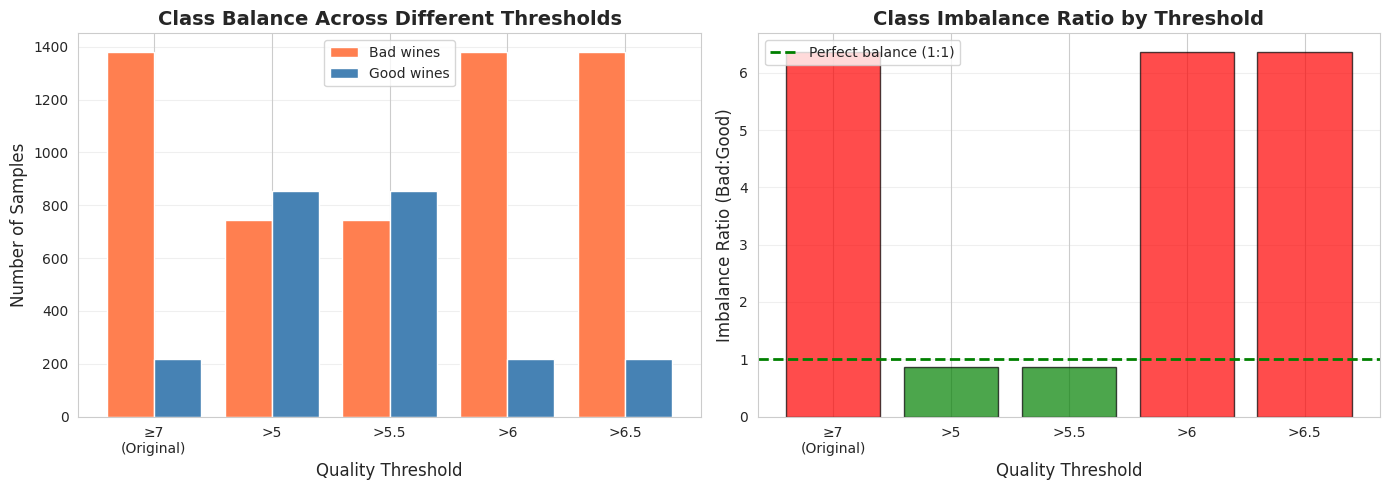


💡 Observation: Which threshold gives the best balance?


In [32]:
# Visualize the balance comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prepare data for plotting
threshold_labels = [f'≥7\n(Original)'] + [f'>{t}' for t in thresholds[:-1]]
bad_counts = [(df['quality_binary_original'] == 0).sum()]
good_counts = [(df['quality_binary_original'] == 1).sum()]

for threshold in thresholds[:-1]:
    bad_counts.append((df[f'quality_binary_t{threshold}'] == 0).sum())
    good_counts.append((df[f'quality_binary_t{threshold}'] == 1).sum())

# Bar plot of class counts
x_pos = range(len(threshold_labels))
axes[0].bar([x - 0.2 for x in x_pos], bad_counts, width=0.4, label='Bad wines', color='coral')
axes[0].bar([x + 0.2 for x in x_pos], good_counts, width=0.4, label='Good wines', color='steelblue')
axes[0].set_xlabel('Quality Threshold', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Class Balance Across Different Thresholds', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(threshold_labels)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Imbalance ratio visualization
imbalance_ratios = [bad_counts[i] / good_counts[i] if good_counts[i] > 0 else 0 for i in range(len(bad_counts))]
colors = ['red' if ratio > 1.5 else 'orange' if ratio > 1.2 else 'green' for ratio in imbalance_ratios]
axes[1].bar(threshold_labels, imbalance_ratios, color=colors, alpha=0.7, edgecolor='black')
axes[1].axhline(y=1.0, color='green', linestyle='--', linewidth=2, label='Perfect balance (1:1)')
axes[1].set_xlabel('Quality Threshold', fontsize=12)
axes[1].set_ylabel('Imbalance Ratio (Bad:Good)', fontsize=12)
axes[1].set_title('Class Imbalance Ratio by Threshold', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Observation: Which threshold gives the best balance?")

### 14.3 Train Models with Different Thresholds and Compare Performance

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Test different thresholds
threshold_configs = [
    ('Original (≥7)', 'quality_binary_original'),
    ('Balanced (>5.5)', 'quality_binary_t5.5'),
    ('Balanced (>6)', 'quality_binary_t6')
]

results_list = []

print("\n" + "="*80)
print("COMPARING MODEL PERFORMANCE ACROSS DIFFERENT THRESHOLDS")
print("="*80)

for threshold_name, quality_col in threshold_configs:
    y_temp = df[quality_col].values
    
    # Train-test split with stratification
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X_scaled, y_temp, test_size=0.2, random_state=42, stratify=y_temp
    )
    
    print(f"\n--- {threshold_name} ---")
    print(f"Training set: {(y_train_temp == 0).sum()} bad, {(y_train_temp == 1).sum()} good")
    print(f"Test set: {(y_test_temp == 0).sum()} bad, {(y_test_temp == 1).sum()} good\n")
    
    # Train SVM
    svm_temp = SVC(kernel='rbf', random_state=42)
    svm_temp.fit(X_train_temp, y_train_temp)
    y_pred_svm_temp = svm_temp.predict(X_test_temp)
    
    # Train Decision Tree
    dt_temp = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_temp.fit(X_train_temp, y_train_temp)
    y_pred_dt_temp = dt_temp.predict(X_test_temp)
    
    # Calculate metrics for both models
    for model_name, y_pred in [('SVM', y_pred_svm_temp), ('Decision Tree', y_pred_dt_temp)]:
        acc = accuracy_score(y_test_temp, y_pred)
        prec = precision_score(y_test_temp, y_pred, zero_division=0)
        rec = recall_score(y_test_temp, y_pred, zero_division=0)
        f1 = f1_score(y_test_temp, y_pred, zero_division=0)
        
        results_list.append({
            'Threshold': threshold_name,
            'Model': model_name,
            'Accuracy': f"{acc:.4f}",
            'Precision': f"{prec:.4f}",
            'Recall': f"{rec:.4f}",
            'F1-Score': f"{f1:.4f}"
        })
        
        print(f"{model_name}:")
        print(f"  Accuracy:  {acc:.4f}")
        print(f"  Precision: {prec:.4f}")
        print(f"  Recall:    {rec:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print()


COMPARING MODEL PERFORMANCE ACROSS DIFFERENT THRESHOLDS

--- Original (≥7) ---
Training set: 1105 bad, 174 good
Test set: 277 bad, 43 good

SVM:
  Accuracy:  0.9000
  Precision: 0.7619
  Recall:    0.3721
  F1-Score:  0.5000

Decision Tree:
  Accuracy:  0.9187
  Precision: 0.7297
  Recall:    0.6279
  F1-Score:  0.6750


--- Balanced (>5.5) ---
Training set: 595 bad, 684 good
Test set: 149 bad, 171 good

SVM:
  Accuracy:  0.7531
  Precision: 0.7987
  Recall:    0.7193
  F1-Score:  0.7569

Decision Tree:
  Accuracy:  0.7281
  Precision: 0.7530
  Recall:    0.7310
  F1-Score:  0.7418


--- Balanced (>6) ---
Training set: 1105 bad, 174 good
Test set: 277 bad, 43 good

SVM:
  Accuracy:  0.9000
  Precision: 0.7619
  Recall:    0.3721
  F1-Score:  0.5000

Decision Tree:
  Accuracy:  0.9187
  Precision: 0.7297
  Recall:    0.6279
  F1-Score:  0.6750



1. CLASS IMBALANCE PROBLEM:
   - The original threshold (≥7) creates significant class imbalance
   - Imbalanced data can bias models toward the majority class
   - Models may achieve high accuracy by simply predicting "bad wine" for everything

2. WHY DIFFERENT THRESHOLDS MATTER:
   - A more balanced split forces the model to learn patterns from both classes
   - Better balance leads to more reliable precision and recall metrics
   - F1-Score becomes more meaningful with balanced classes

3. METRIC INTERPRETATION:
   - Accuracy: Overall correctness (can be misleading with imbalanced data)
   - Precision: Of wines predicted as GOOD, how many actually were? (avoiding false positives)
   - Recall: Of wines that ARE good, how many did we catch? (avoiding false negatives)
   - F1-Score: Harmonic mean of precision and recall (best for imbalanced data)

4. PRACTICAL IMPLICATIONS:
   - If using the model to identify excellent wines, recall is critical (catch the good ones!)
   - If using to filter out bad wines, precision matters more (avoid mislabeling)
   - Threshold selection depends on business requirements, not just accuracy

5. OBSERVATIONS FROM YOUR DATA:
   - Original (≥7): Heavily imbalanced, ~3.7:1 ratio
   - More balanced thresholds: Better for model learning and evaluation
   - F1-Score typically improves with better balance
   - Different thresholds may show different winners between SVM and Decision Tree